### 그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메서드를 사용함 
- groupby()함수 : DataFrame객체.groupby(기준이 되는 열이름)
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용, 결합)

#### groupby
- 특정 열을 기준으로 데이터셋을 묶는다
- ~~ 별 집계를 할 때 사용한다
#### 구문
   - df.groupby('그룹으로묶을기준컬럼')['집계할 컬럼'].집계함수()

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]  # 행 없이 열에 칼럼명 넣기 

print('승객 수:', len(df))
print(df.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [3]:
df.value_counts('class') # 컬럼의 구성을 보기위한 -> class의 구성은 Third, First, Second로 구성됨

class
Third     491
First     216
Second    184
dtype: int64

In [6]:
grouped = df.groupby(['class']) # class칼럼을 기준으로 그룹핑
# list(grouped)
# 그룹객체는 반복문을 이용할 수 있음

for key, group in grouped:  # 그룹이름 (key)과 그룹으로 쪼개진 데이터(group)를 튜플형태로 묶어서 가지고 있음
    print('* key:', key)
    print('* number:', len(group))  # group이 value값으로 생각하면 됨 (반복문 key, value)
    print(group.head())

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [7]:
# 그룹객체에 대한 일반 연산 --> 개별 그룹별(age, fare, survived 데이터) 연산 수행
# 그룹별 평균 : group객체.mean()

average = grouped.mean() # 그룹별 평균
average # 결과를 보면 연산이 가능한 (숫자형)열에 대해서만 결과를 반환해줌

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [8]:
grouped.max() # 그룹별 최대값

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [10]:
# 그룹 추출 : group객체.get_group('그룹이름')
# get_group() 함수를 그룹객체에 적용해 나눠진 그룹중 가져오고 싶은 그룹만 가져옴
#'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력 (describe())

group3 = grouped.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [11]:
# class 열, sex 열을 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex']) # groupby는 하나의 기준만 아니라 멀티 기준을 사용 가능 -> 좀 더 디테일하게
                                             # class의 3개의 기준 * sex컬럼의 2개의 기준 -> 총 6개의 조합
                 ## class기준으로 먼저 그룹> 그 안에서 sex로 그룹화 > why? 리스트는 순서가 있는 자료형이기 때문
for key, group in grouped_two:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head)

* key: ('First', 'female')
* number: 94
<bound method NDFrame.head of       age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]>
* key: ('First', 'male')
* number: 122
<bound method NDFrame.head of       age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       

In [12]:
# 이 상태에서 다시 집계함수 적용
# 등석(class)별, 성(sex)별 평균 연령대와 요금, 생존률을 확인할 수 있음
average_two = grouped_two.mean() # 좀 더 구체적으로 평균을 구할 수 있다 -> groupby의 멀티 기준 
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
# 여러가지 그룹연산 메소드
# 판다스에 내장된 기본 집계 함수
# mean(), max(), min(), sum(), count(), size(), var(), std(), describe(),..등

In [ ]:
# ('Third', female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력

In [13]:
# 다시 타이타닉 데이터 그룹핑
# # 다중그룹일때 (( )) 대괄호 하나 더 추가
group3f = grouped_two.get_group(('Third','female'))  # 그룹된 grouped_two에서의 'Third'와 'female'을 다시 한번 그룹핑
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [14]:
group3f[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


# 적용-결합 데이터 집계(aggregation)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수1,함수2,함수3,....])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1,'열2':함수2,...}] -> 딕셔너리 타입으로 

# 변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

# 필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group객체.filter(조건 함수식)

# 객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

In [ ]:
# (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행을 출력

In [101]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

grouped = df.groupby(['class']) # class 기준으로 그룹핑
grouped.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
9,14.0,female,Second,30.0708,1


In [77]:
grouped.get_group('First')

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0
11,58.0,female,First,26.5500,1
23,28.0,male,First,35.5000,1
...,...,...,...,...,...
871,47.0,female,First,52.5542,1
872,33.0,male,First,5.0000,0
879,56.0,female,First,83.1583,1
887,19.0,female,First,30.0000,1


In [17]:
# grouped의 모든 열에 min, max 함수를 적용하여 출력
agg_all = grouped.agg(['min','max']) # class 기준으로 그룹핑된 (그룹 객체에).agg('함수1', '함수2') -> grouped.agg()
agg_all.head() # class별로 각 칼럼의 min값과 max값을 확인

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [ ]:
# grouped에서 age열은 mean, fare열은 min, max 함수를 적용하여 출력

In [19]:
agg_sep = grouped.agg({'age':'mean','fare':['min','max']}) # 딕셔너리 타입으로
agg_sep # age은 평균 fare는 min, max 값

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [ ]:
# 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행을 출력

In [21]:
#class 기준으로 그룹핑된 (그룹 객체에) grouped에 filter함수 적용 
grouped_filter = grouped.filter(lambda x: len(x)>=200)  # 그룹별 row수가 200개 이상인 그룹만 추출
print(grouped_filter,'\n')

grouped_filter.value_counts('class') # second그룹은 필터링되어 추출되지 않음

      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
1    38.0  female  First  71.2833         1
2    26.0  female  Third   7.9250         1
3    35.0  female  First  53.1000         1
4    35.0    male  Third   8.0500         0
..    ...     ...    ...      ...       ...
885  39.0  female  Third  29.1250         0
887  19.0  female  First  30.0000         1
888   NaN  female  Third  23.4500         0
889  26.0    male  First  30.0000         1
890  32.0    male  Third   7.7500         0

[707 rows x 5 columns] 



class
Third     491
First     216
Second      0
dtype: int64

In [18]:
# Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행 출력

In [23]:
# First의 age 평균은 30보다 작지않은것 같다는 추론을 할 수 있음
age_filter = grouped.filter(lambda x : x.age.mean() < 30) 
age_filter.tail(5)

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [ ]:
# Q. 각 그룹별 통계요약표를 집계하세요.

In [24]:
for key, group in grouped: # grouped는 df.groupby(['class'])로 class별로 그룹해둔 객체
    print(key, group.describe(),'\n')

First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [25]:
# 그룹객체에 함수 매핑 : apply()
# group객체.apply(매핑함수) -> 개별 원소가 아닌 그룹별 매핑이 기준
agg_grouped = grouped.apply(lambda x: x.describe()) # apply는 전형적인 함수 매핑
agg_grouped # 각 클래스별 기초통계 요약표 -> groupde가 groupby.class이므로

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [ ]:
# 평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 사용자 함수를 작성

In [26]:
def z_score(x): # 데이터 정규화
    return (x- x.mean())/x.std()  #  편차 / 표준편차 -> 평균이 0이고 표준편차가 1인 표준정규분포로 변환해주는 기준
# x값에서 그 x값들의 평균을 뺏슴 ->(편차), 그것을 표준편차로 나눔 -> 편차가 표준편차의 몇배냐를 보여줌
# 결국 평균이 0이고 표준편차가 1인 -> 표준정규분포 형태

In [ ]:
# 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform() 함수로 변환

In [35]:
# 연산 후 기존 데이터프레임의 형태로 : transform()
# transform()함수는 그룹별로 매핑을 적용하긴 하지만, 그룹별로 집계하지 않고 원래 데이터프레임의 형태로 반환
grouped.age.transform(z_score)[:3] # 평균이 0이고 표준편차가 1임 -> 샘플 수가 많아질수록 값에 근사해짐

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [ ]:
# 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply() 함수로 매핑하여 출력

In [34]:
# 이것들의 평균은 0이고 표준편차는 1이됨 유의할점 샘플수가 많을수록 그 값에 근사함
grouped.age.apply(z_score)[:3] 

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [33]:
grouped[['age']].apply(lambda x : z_score(x))[:3] # apply함수를 이용해 z_score함수 매핑 후 0번째에서 2번 index까지 출력

,age
0,-0.251342
1,-0.015770
2,0.068776


In [39]:
df1 = df.groupby(['class','sex'])
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
# class 값이 First인 행을 선택하여 출력

In [43]:
df2 = df1.mean()
print(df2,'\n')
type(df2)

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447 



pandas.core.frame.DataFrame

In [44]:
df2.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [ ]:
# class 값이 First이고 sex값이 female인 행을 선택하여 출력

In [45]:
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

### 피벗 (데이터 탐색하는데에 유용하게 쓰임)
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수<평균, 최소, 최대값 등>)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [112]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan # 각 열마다 별도로 데이터 갯수를 센다
df  l

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [ ]:
# loc 인덱스 기준으로 행 데이터 읽기
# iloc 행 번호를 기준으로 행 데이터 읽기

In [111]:
df.count()

0    4
1    4
2    4
3    3
dtype: int64

In [78]:
import pandas as pd
df2 = pd.read_pickle('./dataset/df2.pkl')
df2.head()

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

df= titanic.copy()
df= df.loc[:,['age','sex','class','fare','survived']] # 전체 행 + 해당 열 가져오기
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [4]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계

pdf1 = pd.pivot_table(df,
                     index ='class', # 행 위치에 들어갈 열
                     columns ='sex', # 열 위치에 들어갈 열
                     values ='age', # 데이터로 사용할 열 -> 안에 들어갈 값
                     aggfunc ='mean' # 데이터 집계 함수
                     )
pdf1.head() # 클래스별 여성 남성의 나이 평균

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [5]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계

pdf2 = pd.pivot_table(df,
                     index ='class', # 행 위치에 들어갈 열
                     columns ='sex', # 열 위치에 들어갈 열
                     values ='survived', # 데이터로 사용할 열
                     aggfunc = ['mean','sum']) # 데이터 집계 함수 -> 복수개 설정 가능
                     
pdf2.head()  # 클래스별 여성/남성의 생종 평균, 합계

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [7]:
import pandas as pd

pdf3 = pd.pivot_table(df,
                     index =['class'],
                     columns =['survived'],
                     values ='fare',
                     aggfunc = ['mean','max','min']) # 좀 더 복잡합 피봇팅이 가능
pdf3.head() 

mean                max            min         
survived          0          1       0         1    0        1
class                                                         
First     64.684007  95.608029  263.00  512.3292  0.0  25.9292
Second    19.412328  22.055700   73.50   65.0000  0.0  10.5000
Third     13.669364  13.694887   69.55   56.4958  0.0   0.0000

In [16]:
# titanic 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행 

pdf4 = pd.pivot_table(df,
                    index = ['class','survived'], # 행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = ['fare'], # 데이터로 사용할 열
                    aggfunc = ['max']) # 데이터 집계 함수
pdf4

max          
                     fare          
sex                female      male
class  survived                    
First  0         151.5500  263.0000
       1         512.3292  512.3292
Second 0          26.0000   73.5000
       1          65.0000   39.0000
Third  0          69.5500   69.5500
       1          31.3875   56.4958

In [115]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat = ''
    if age <=5:
        cat = 'baby'
    elif age <=12:
        cat ='child'
    elif age <=19:
        cat = 'teenager'
    elif age<= 35:
        cat ='young_adult'
    elif age<=60:
        cat ='adult'
    else:
        cat ='elderly'
        
    return cat

#df[칼럼명] = df.속성명.apply(람다함수 (사용자함수))
df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))

pdf = pd.pivot_table(df, index = ['class', 'sex'], columns='age_cat', values='survived', aggfunc=['mean','sum'])
pdf.head()

mean                                                   sum  \
age_cat           adult      baby child   elderly  teenager young_adult adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       baby child elderly teenager young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

### 시계열 데이터
  - df의 행 인덱스로 사용되면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
  - 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
  - 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시리얼 객체인 Timestamp로 변환하는 함수를 제공
  - 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환

In [143]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [144]:
df.info() # date가 object임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [145]:
# 문자열 데이터를 datetime64 자료형으로 변환
df['new_date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [147]:
# new_data 칼럼 하나의 원소는 타임스탬프 타입
type(df['new_date'][0])
df.head()

,Date,Close,Start,High,Low,Volume,new_date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [148]:
df1 = df.copy()
df1.set_index('new_date', inplace=True)
df1.drop('Date', axis=1, inplace=True) # Date는 드랍
df1.head()

,Close,Start,High,Low,Volume
new_date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [149]:
# 인덱스 재설정
df1 = df1.reset_index()
df1.head()

,new_date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [150]:
# 날짜 데이터 분리 
# dt 속성을 이용하여 new_date 열의 연 월 일 정보를 년 월 일 컬럼으로 구분
df1=df.copy()
df1['Year']=df1.new_date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_date,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [151]:
df1['Month']=df1.new_date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [152]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_date.dt.to_period(freq='M') # to_period(freq='')
df1.head()

,Date,Close,Start,High,Low,Volume,new_date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [154]:
# set_index로 new_date를 index로 재설정 

df1.set_index('new_date',inplace=True) # 데이터프레임으로 만든 new_date를 인덱스로 설정
df1.drop('Date',axis=1, inplace=True) # 기존의 Date는 버림
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [155]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [156]:
df_d = df1.loc['2018-06-27','Start':'High'] # 여러개 조건 설정
df_d.head()

,Start,High
new_date,,
2018-06-27,10800,11050


In [158]:
# 날짜 간격

endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta', inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06


In [159]:
# 사계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                     end=None,   # end 와 poeriods가 와꾸가 맞아야함 아니면 error 따라서 none으로 부여 시 자동할당
                     periods=12, 
                      freq='MS', # MS 월초, M 월말, 3M 3개월
                      tz='Asia/Seoul' )
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [160]:
df1.shape

(20, 8)

In [162]:
import warnings
warnings.filterwarnings('ignore')

df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,2018-06,2019-05-01 00:00:00+09:00


In [163]:
# df_a.drop('Month', axis=1, inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [164]:
df_a.set_index('Month',inplace=True) # 뽑은 Month 값을 set_index로 index 재설정
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

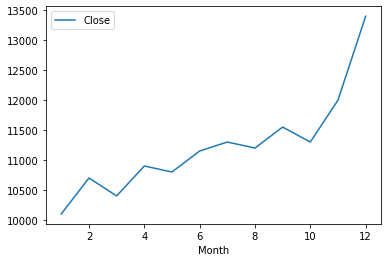

In [165]:
df_g = df_a[['Close']] # 종가 뽑은 데이터로 plot
df_g.plot()

In [173]:
# df_r = df_a.reset_index()
# df_r

df_a = df_r.set_index('index')
df_a.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06


In [172]:
df_sorted = df_a.sort_index(ascending = False) # index 기준 sort
df_sorted.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06


In [174]:
df_value = df_a.sort_values(by='Volume', ascending =False)
df_value.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06


# 파이썬 timestamp, datetime

In [179]:
# Period 배열

pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='M') # 월
print(pr_m,'\n')

pr_h = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='2H') # 시간
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


##### python, numpy, pandas 날짜 타입 비교 및 정리 https://ellun.tistory.com/320

In [1]:
# timestamp -> str 변환

import time
today = time.time()
print(today, type(today), '\n')

s= str(today)
print(s,type(s))

1642660121.0685458 <class 'float'> 

1642660121.0685458 <class 'str'>


In [2]:
# datetime -> str

from datetime import datetime
s = datetime.now()
print(s, type(s),'\n')

s1 = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # stringfortime
print(s1, type(s1))

2022-01-20 15:28:44.936323 <class 'datetime.datetime'> 

2022-01-20 15:28:44 <class 'str'>


In [186]:
# str -> datetime

s = '2022-01-17 14:14:14' # str
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S') # string parsing time
print(dt,type(dt))

2022-01-17 14:14:14 <class 'datetime.datetime'>


In [187]:
# str -> timestamp
# timestamp 만드는 방법 -> time.mktime().timetuple()
from datetime import datetime
import time

s = '2022-01-17 14:18:15' # str
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple()) # string parshing time
print(ts) # string을 -> datetime으로 바꾸어주고 그것을 결국 timestamp로 바꾸어줌
# string [string parshing time] -> datetime -> [time.mktime().timetuple()] -> timestamp

1642396695.0


In [66]:
# datetime -> timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple()) # datetime을 time.mktime.().timetuple을 사용해 timestamp로 변환
print(ts,type(ts))

2022-01-17 14:26:02.399587 <class 'datetime.datetime'> 

1642397162.0 <class 'float'>


In [6]:
# [과제] 1) str -> datetiem, 2) datetime -> str -> timestamp, 3) timestamp -> str -> datetime

import datetime
from datetime import datetime
import time
import pandas as pd

# str -> datetime
s='2022-01-17 14:14:22'
dt =datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt),'\n')

# datetime -> str -> timestamp

a = datetime.now()
b= str(a)
c = time.mktime(datetime.strptime(b, '%Y-%m-%d %H:%M:%S.%f').timetuple())
print(c,type(c),'\n')

# timestamp -> str ->datetime
today = time.time()
print(today, type(today),'\n')

t = datetime.fromtimestamp(today)
print(t,type(t),'\n')
s = str(t)
print(s, type(s),'\n')


z =datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')
print(z,type(z))

2022-01-17 14:14:22 <class 'datetime.datetime'> 

1642465474.0 <class 'float'> 

1642465474.3394508 <class 'float'> 

2022-01-18 09:24:34.339451 <class 'datetime.datetime'> 

2022-01-18 09:24:34.339451 <class 'str'> 

2022-01-18 09:24:34.339451 <class 'datetime.datetime'>


In [14]:
import datetime, time

# str -> datetime
s='2013-12-24 13:12:24'
dt = datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt)) # datetime

# timestamp -> str -> datetime
tm = time.time()
stm = str(tm)
print(stm,type(stm))  # timestamp -> str

dtm = datetime.datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))  # str -> datetime

# datetime -> str -> timestamp
st = str(dt)
print(st,type(st))

tst = time.mktime(datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S').timetuple())
print(tst, type(tst))

2013-12-24 13:12:24 <class 'datetime.datetime'>
1642515618.6498969 <class 'str'>
2022-01-18 23:20:18.649897 <class 'datetime.datetime'>
2013-12-24 13:12:24 <class 'str'>
1387858344.0 <class 'float'>


In [68]:
# 1년전 datetime 값
from datetime import timedelta # timedelta import 해줌
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days =-365) # timedelta는?
print(delta_datetime)

datetime_now + delta_datetime # 1년 전 날짜 나옴

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 41, 57, 947168)

In [70]:
# 두 날짜간의 일수 구하기
from datetime import datetime

since_timestamp = datetime.strptime('20180301','%Y%m%d') # 문자를 -> datetime으로 파싱 
until_timestamp = datetime.strptime('20180331','%Y%m%d')

result = until_timestamp - since_timestamp # 그것을 빼줌
result

datetime.timedelta(days=30)

In [188]:
# 특정 요일 구하기
import datetime
def get_days(y,m,d):
    days=['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()] # 숫자값으로 리턴됨 -> 월요일부터 인덱스 0
get_days(2022,1,18)

'TUE'

In [15]:
# 판다스 이용 -> 파이선의 datetime =  판다스의 timestamp
t = pd.Timestamp(1513393335, unit='s', tz='US/Pacific') # 실수를 넣어주면 timestamp로 datetime형태로 출력
print(t, type(t)) # 1970년 1월 1일 이후로 부터의 날짜 값 계산

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [190]:
today = time.time()
today

1642429739.0689492

In [193]:
date = pd.Timestamp(1642429739.0689492, unit='s', tz='Asia/Seoul')
print(date,type(date))

2022-01-17 23:28:59.068949223+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [195]:
# pd.Timestamp(기준 날짜) 설정 후  pd.tp_datetime[(1,2,3)] 3개를 일'D' 기준으로 만들기
pd.to_datetime([1,2,3], unit= 'D', origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [196]:
pr_m = pd.period_range(start='2019-01-01', end=None, periods=3, freq='M') # 간격이 열 단위
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [197]:
import numpy as np

sr0 = pd.Series(pd.date_range('2021-01-01', periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')

df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1875,96.96
1,2021-01-02,1051,29.70
2,2021-01-03,1359,28.79
3,2021-01-04,1550,11.62
4,2021-01-05,1545,18.17


In [74]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [49]:
import pandas as pd
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 반올림하여 소수점 아래 둘째 자리까지 출력하세요

In [51]:
new_df = auto_df.copy()
mpg_to_kpl = 1.60934/3.78541 # 환산하는 값 설정
# new_df['kpl'] = (new_df.mpg/2.352)
new_df['kpl'] = (new_df.mpg * mpg_to_kpl) # kpl이라는 새로운 컬럼을 만들어주고 기존의 mpg에 환산값을 곱하여 대입함
new_df[['mpg','kpl']].head(3).round(2)

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


In [7]:
# horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는 이유)
# (hint : np.nan으로 대체)
# 데이터에 특수문자(?, !, ^)가 있으면 처리해줘야함

In [53]:
import numpy as np
df1 = auto_df.copy()
df1.horsepower.unique() # '?' 값을 (결측값)을 replace로 대체해줌

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [55]:
df1.horsepower= df1.horsepower.replace('?', np.nan)
# sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce') -> 강제로 결측값을 대체해줌
df1.info()
print(df1.horsepower.isnull().sum())
# df_sorted = df1.sort_values(by='horsepower',ascending=False)
# df_sorted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
6


In [56]:
df1.horsepower.unique() # '?'가 'nan'값으로 대체된것을 확인함

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 삭제 전 후로 비교하세요.

In [57]:
df1.horsepower = df1.horsepower.astype(float) # type 변경
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [58]:
print(df1.horsepower.isnull().sum()) # dropna 하기전 결측치 값 개수
df1.dropna(subset=['horsepower'], axis=0, inplace= True) # dropna 실행 -> 누락 데이터 삭제
df1.horsepower.isnull().sum() # dropna 실행 후 결측치 값 개수 확인

6


0

In [ ]:
# auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.

In [59]:
# 재활용하여 쓰기위해 중간에 pickle로 저장 후 불러와서 사용
import csv
import pickle
df1.to_pickle('./dataset/auto_df.pkl') # 저장
df1 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
# horsepower 열의 최대값을 구하고 구한값을 절대값으로 나누어 horsepower 열의 모든 데이터를 저장하세요.

In [63]:
import pandas as pd
df_max = df1.horsepower.max() # horsepower열의 최대값 구함
df_max 
df_div = df1.horsepower / abs(df_max) # 데이터 정규화
df_div.head()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

<AxesSubplot:>

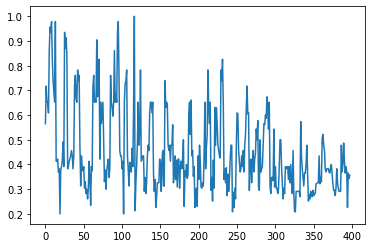

In [62]:
df_div.plot() # 어떤 수의 집합에 있어서 최대값으로 나누면 1을 넘을 수가 없음

In [ ]:
# horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요

In [64]:
# MinMaxScaler
a = min(df1.horsepower)
b = max(df1.horsepower)
df1.horsepower=df1.horsepower.apply(lambda x:(x-a)/(b-a)) # 0에서 1사이의 분포가 형성됨
df1.horsepower

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64

<AxesSubplot:>

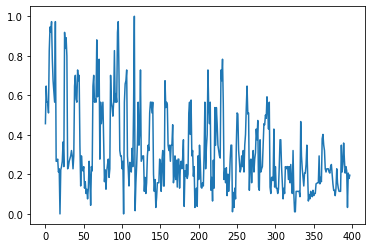

In [65]:
df1.horsepower.plot()  

In [33]:
# origin열의 고유값을 출력하세요

In [34]:
df1.origin.unique()

array([1, 3, 2], dtype=int64)

In [ ]:
# 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')

In [35]:
df1.origin.replace({1:'USA',2:'EU',3:'JAPAN'}, inplace=True)
print(df1['origin'].unique())

['USA' 'JAPAN' 'EU']


In [ ]:
# origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.

In [38]:
df1 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기

print(df1.info()) # origin -> int64
df1.origin = df1.origin.astype('category')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null

In [ ]:
# origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.

In [39]:
df1.origin = df1.origin.astype('str')
print(df1.origin[:3], df1.origin.dtype)

0    1
1    1
2    1
Name: origin, dtype: object object


In [ ]:
# hrosepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔

In [42]:
import numpy as np
count,bin_dividers = np.histogram(df1.horsepower, bins=3) # np.histogram -> 3등분 해주기 위해 4개의 기준이 필요
print(bin_dividers)

bin_names = ['저출력','보통출력','고출력'] # 3개의 범주로 나누어줌
df1['hp_bin'] = pd.cut(x = df1.horsepower, # 데이터 배열
                      bins = bin_dividers, # 경계 값 리스트
                      labels = bin_names, # bin 이름
                      include_lowest = True) # 첫 경계값 포함
df1[['horsepower','hp_bin']].head(10) 

[ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [43]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요

In [48]:
df1.horsepower = df1.horsepower/(abs(df1.horsepower).max())
df1[['horsepower']].describe() # 데이터프레임 형식으로 출력하려면 [[ ... ]] 대괄호 2개
                                    # 시리즈 형태는 [ .. ] 대괄호 1개

,horsepower
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000


# 데이터 분석 과정
   - 데이터 살펴보기 > 데이터 개수 확인( count(), value_counts() > 통계함수 > 데이터 전처리 

# 자동차 연비 데이터셋
   - mpg : 연비
   - cylinders : 실린더수 
   - displacement : 배기량
   - horsepower: 출력
   - weight : 차중
   - acceleration : 가속능력
   - model year : 출시년도
   - origin : 제조국 1(USA), 2(EU), 3(JPN)
   - name : 모델명

###  데이터 살펴 보기 

In [114]:
# 데이터 적재
import pandas as pd

df = pd.read_csv('./dataset/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [116]:
# 열 이름을 지정해줌
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head() # 열 이름 지정해준것 확인

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [118]:
# 데이터프레임의 크기(행, 열) -> 튜플
df.shape

(398, 9)

In [117]:
# 데이터프레임 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [43]:
# df 자료형 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [119]:
# 시리즈(mpg 열)의 자료형 확인
df.mpg.dtypes

dtype('float64')

In [120]:
# df의 기술 통계 정보 확인
# 카운트, 평균, 표준편차, 최대값, 최소값, 중간값, unique(고유값의 수), top(최빈값), freq(빈도수)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [121]:
# include='all' 옵션 사용 -> 모든 컬럼을 보여줌
# type을 넣을때는 []을 넣어야 하고, 그냥 string은 type이 안인 all과 같은 특수의미
# top은 가장 많은 빈도수를 갖는 변수
# freq는 top에 해당하는 변수의 빈도수
# unique는 중복을 제거한 종류의 수
# 수치를 빈도수로 표현하고자 하면 데이터타입을 object 형태로 변경해 주어야지만 빈도수 등을 표현할 수 있습니다.
# why? 수치형 데이터의 요약값과 object 타입의 요약값이 다르기 때문

df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [70]:
# name 열의 기술 통계 정보 확인
df.name.describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [71]:
# mpg 열의 기술 통계 정보 확인
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

### 데이터 개수 확인

In [72]:
# df의 각 열이 가지고 있는 원소 개수 확인
df.count()

mpg             398
cyinders        398
displacemnet    398
horsepower      398
weight          398
cceleration     398
model year      398
origin          398
name            398
dtype: int64

In [73]:
# df.count()가 반환하는 객체 타입 출력
type(df.count())

pandas.core.series.Series

In [122]:
# df의 특정 열('origin')이 가지고 있는 고유값 확인
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

<AxesSubplot:ylabel='Frequency'>

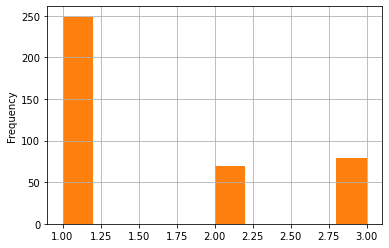

In [123]:
# df의 특정 열('origin')의 histogram 그리기 -> series.hist()함수
df['origin'].plot(kind='hist', grid=True)
df['origin'].hist()

### 통계함수

In [76]:
# 평균값
import warnings
warnings.filterwarnings('ignore')

df.mean()

mpg               23.514573
cyinders           5.454774
displacemnet     193.425879
weight          2970.424623
cceleration       15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [77]:
# 특정 열('mpg')의 평균값
df['mpg'].mean()
# df.mpg.mean()

23.514572864321615

In [78]:
# 특정 열들('mpg'.'weight'의 평균값)
df[['mpg','weight']].mean()

mpg         23.514573
weight    2970.424623
dtype: float64

In [79]:
# 중간값
df.median()

mpg               23.0
cyinders           4.0
displacemnet     148.5
weight          2803.5
cceleration       15.5
model year        76.0
origin             1.0
dtype: float64

In [65]:
# 특정 열('mpg')의 중간값
df['mpg'].median()

23.0

In [66]:
# 최대값
df.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                      5140
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object

In [62]:
# 특정 열('mpg')의 최대값
df['mpg'].max()

46.6

In [5]:
# 최소값
df.min()

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                          100
weight                             1613
acceleration                        8.0
model year                           70
origin                                1
car name        amc ambassador brougham
dtype: object

In [14]:
import warnings
warnings.filterwarnings('ignore')

# 표준편차
df.std()
# 특정 열의 표준편차
# df['mpg'].std()

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [124]:
# 상관계수 -> 산점도로 표현하면 알기 쉬움
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [125]:
# mpg와 weight의 상관 계수
df[['mpg','weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

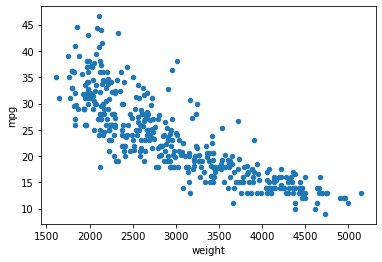

In [126]:
df.plot(kind='scatter',x ='weight',y='mpg')

### 데이터 전처리

In [128]:
# 데이터 구간 분할
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [83]:
# horsepower 열의 누락 데이터 ('?') 삭제하고 실수형으로 반환

In [130]:
# ?을 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)

In [132]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [133]:
# 누락데이터 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)

In [134]:
df.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
name            392
dtype: int64

In [135]:
# 문자열을 실수형으로 반환
df['horsepower'] = df['horsepower'].astype('float64')
# df.horsepower = df.horsepower.astype(float64)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [137]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 'horsepower' 열에 대해 '저출력', '보통출력', '고출력' 으로 구간을 나누어 새로운 열 만들기 -> df['hp_bin']

### pd.cut 옵션
   - pd.cut('나눌칼럼''나눌길이')로 동일 길이로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구함
   - inclued_lowest = True : 가장 작은 구간의 최솟값도 포함 

In [138]:
cats = pd.cut(df['horsepower'], 3, labels=['저출력', '보통출력', '고출력'])
cats

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: horsepower, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [139]:
df['hp_bin'] = cats # 새로운 칼럼 생성 후 -> '저출력', '보통출력','고출력' 값 넣어줌

In [141]:
count

array([257, 103,  32], dtype=int64)

In [143]:
bin_divider

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [144]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,저출력


In [145]:
# hp_bin 열에 대해 빈도수 확인하기
pd.value_counts(df.hp_bin)

저출력     257
보통출력    103
고출력      32
Name: hp_bin, dtype: int64

In [74]:
# get_dummies 에제
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', np.nan],
                      'color':['red', 'yellow', 'red', 'green', np.nan]})   #예시 데이터 생성
fruit # 데이터프레임 생성

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green
4,NaN,NaN


In [79]:
# 생성할 dummy variable의 column 이름 앞에 붙을 prefix를 지정합니다. 범주형 column에 따라 리스트나 딕셔너리를 통해 column 별 prefix를 따로 지정할 수 있음
pd.get_dummies(fruit, prefix=['fruit', 'clr'], prefix_sep='@@') # 중복값은 출력 안해줌 red 1개만

,fruit@@apple,fruit@@banana,fruit@@cherry,fruit@@durian,clr@@green,clr@@red,clr@@yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [77]:
# dummy_na를 True로 하면 NaN 에도 dummy variable이 생긴 것을 알 수 있습니다.
# fruit_nan, clr_nan에도 값이 생성됨
pd.get_dummies(fruit, prefix=['fruit', 'clr'], dummy_na=True) #  prefix_sep = default값이 _

,fruit_apple,fruit_banana,fruit_cherry,fruit_durian,fruit_nan,clr_green,clr_red,clr_yellow,clr_nan
0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1


In [80]:
# columns를 따로 지정하면 지정한 column에 대해서만 one-hot encoding을 수행합니다. -> color는 생성 안됨
pd.get_dummies(fruit, columns=['name'], dummy_na=True)

,color,name_apple,name_banana,name_cherry,name_durian,name_nan
0,red,1,0,0,0,0
1,yellow,0,1,0,0,0
2,red,0,0,1,0,0
3,green,0,0,0,1,0
4,NaN,0,0,0,0,1


In [81]:
# drop_first를 True로 지정하면 맨 처음 범주에 대해서는 별도로 dummy variable을 할당하지 않고 나머지 범주의 여집합으로 표현합니다. k개의 범주에 대해 k-1개의 dummy variable이 생성됩니다
pd.get_dummies(fruit, columns=['name'], drop_first=True, dummy_na=True)
# name_apple 에는 값 할당 하지 않고 나머지 하나는 다른 dummy(color)로 표현됨

,color,name_banana,name_cherry,name_durian,name_nan
0,red,0,0,0,0
1,yellow,1,0,0,0
2,red,0,1,0,0
3,green,0,0,1,0
4,NaN,0,0,0,1


In [82]:
# 마지막으로 dtype을 float으로 지정하면 정수가 아닌 실수형으로 표현됩니다.
pd.get_dummies(fruit, columns=['name'], drop_first=True, dummy_na=True, dtype=float)

,color,name_banana,name_cherry,name_durian,name_nan
0,red,0.0,0.0,0.0,0.0
1,yellow,1.0,0.0,0.0,0.0
2,red,0.0,1.0,0.0,0.0
3,green,0.0,0.0,1.0,0.0
4,NaN,0.0,0.0,0.0,1.0


In [146]:
# 더미 변수 -> 0, 1로 표현되는 값으로 어떤 특징이 존재지에 대한 여부를 표시하는 독립 변수
# get_dummies(데이터프레임,columns='컬럼명'... ) ->  columns를 따로 지정해주지 않으면 문자(열) 데이터로 이루어진 칼럼이 자동으로 지정되어 처리

dummies = pd.get_dummies(df.hp_bin)
df_dummies = df.iloc[:,:-1].join(dummies)
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,저출력,보통출력,고출력
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1,0,0


In [147]:
# 시각화
import pandas as pd
df = pd.read_csv('./dataset/auto-mpg.csv', header=None)
df.columns=['mpg','cylineders','displacement','horsepower','weight',
           'accleration','model year','origin','name']

In [148]:
df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [149]:
df['mpg'].min(), df['mpg'].max()

(9.0, 46.6)

<AxesSubplot:ylabel='Frequency'>

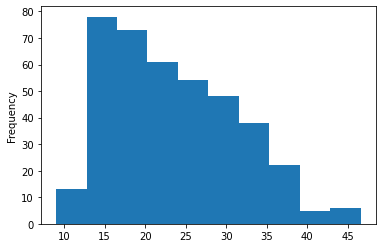

In [150]:
df.mpg.plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

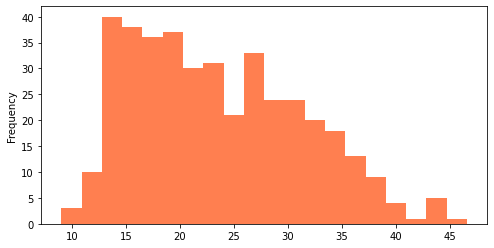

In [154]:
df["mpg"].plot(kind="hist", bins=20, color="coral", figsize=(8, 4)) # bins 늘리고 figsize 늘릴 수 있음

In [156]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### 스타일 설정

In [157]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Frequency'>

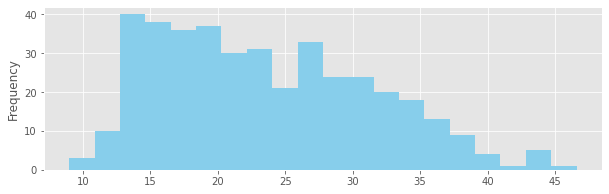

In [159]:
df.mpg.plot(kind='hist', bins=20,color='skyblue',figsize=(10,3))

<AxesSubplot:xlabel='weight', ylabel='mpg'>

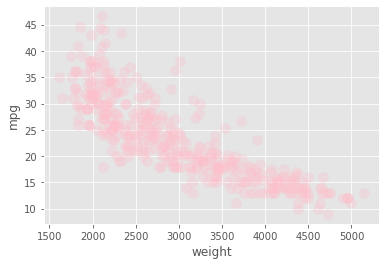

In [160]:
df.plot(kind='scatter', x='weight', y='mpg', c='pink', s =100, alpha=0.3)

In [161]:
df.head()

,mpg,cylineders,displacement,horsepower,weight,accleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [165]:
df['cylineders']

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylineders, Length: 398, dtype: int64

In [167]:
cylineder_size = df.cylineders/df.cylineders.max()*300

<AxesSubplot:xlabel='weight', ylabel='mpg'>

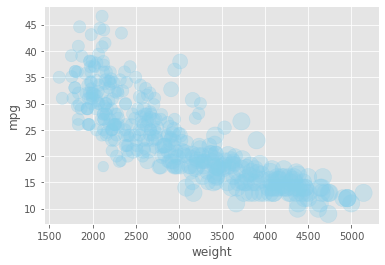

In [168]:
df.plot(kind='scatter', x = 'weight', y='mpg', c='skyblue', s= cylineder_size, alpha=0.3)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

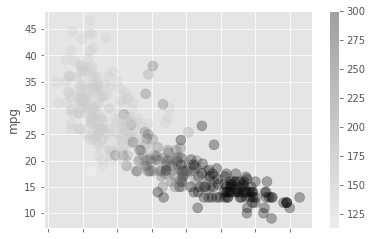

In [171]:
# 색이 진할수록 cylinder 큰 값
df.plot(kind='scatter', x='weight', y='mpg', c=cylineder_size, s=100, alpha=0.3, cmap="binary")

In [172]:
# origin :  제조국 1(USA), 2(EU), 3(JPN)
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [173]:
df.groupby('origin').size() # USA가 압도적으로 많음을 확인

origin
1    249
2     70
3     79
dtype: int64

In [176]:
df_origin = pd.DataFrame()
df_origin['count'] = df.groupby('origin').size()

In [177]:
df_origin["count"]

origin
1    249
2     70
3     79
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

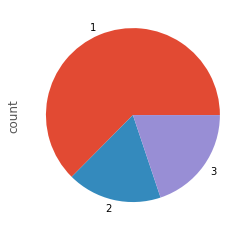

In [178]:
df_origin["count"].plot(kind="pie")

<AxesSubplot:ylabel='count'>

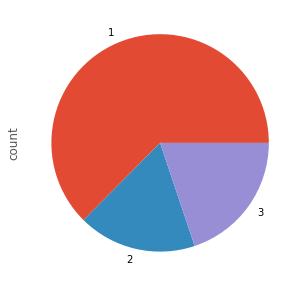

In [179]:
df_origin['count'].plot(kind='pie', figsize=(7,5))

### startangle : 시작 각, default = 0 -> 동쪽, 각 커질수록 반시계방향으로 돌아감

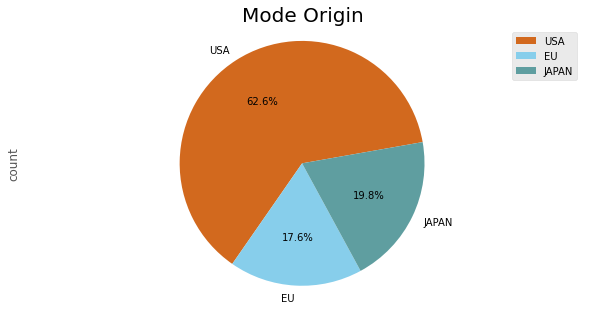

In [183]:
df_origin.index=['USA','EU','JAPAN']
df_origin['count'].plot(kind='pie',
                       figsize=(10,5),
                       startangle=10,
                       colors=['chocolate','skyblue','cadetblue'],
                       autopct='%1.1f%%') # 소수점 자리수 설정

plt.title('Mode Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='best')
plt.show()

In [184]:
df.origin==1

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: origin, Length: 398, dtype: bool

<AxesSubplot:>

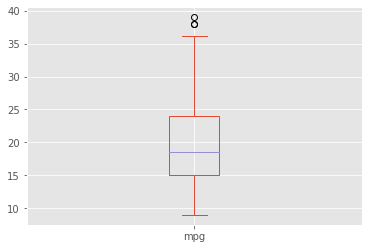

In [187]:
df[df['origin']==1]['mpg'].plot(kind='box')

<img src="./dataset/boxplot.png">

### -fig : 도화지 역할

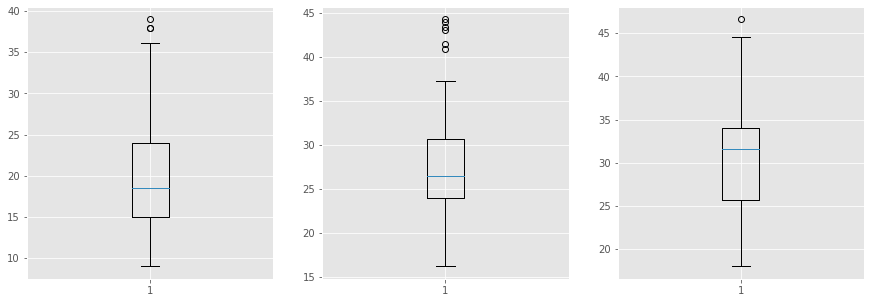

In [188]:
fig = plt.figure(figsize=(15,5))

# 도화지를 1*3으로 나눔

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.boxplot(x=df[df['origin'] ==1]['mpg'])
ax2.boxplot(x=df[df['origin'] ==2]['mpg'])
ax3.boxplot(x=df[df['origin'] ==3]['mpg'])

plt.show()

### 상관계수 문제
 - 통계에서 30% 이상을 약한 상관관계, 70% 이상을 강한 상관관계라 함
 <img src="./dataset/상관관계.png">

In [30]:
print(df.corr().loc['cylinders'],end='\n\n')

for i in df.corr().loc['cylinders'].index: #['mpg', 'cylinders', 'displacement', 'weight', 'acceleration','model year', 'origin']
    if abs(df.corr().loc['cylinders'][i]) > 0.7:
        print(f'cylinders {i}는 강한 상관관계')
    elif abs(df.corr().loc['cylinders'][i]) > 0.3:
        print(f'cylinders {i}는 약한 상관관계')
        
df.corr()

mpg            -0.775396
cylinders       1.000000
displacement    0.950721
weight          0.896017
acceleration   -0.505419
model year     -0.348746
origin         -0.562543
Name: cylinders, dtype: float64

cylinders mpg는 강한 상관관계
cylinders cylinders는 강한 상관관계
cylinders displacement는 강한 상관관계
cylinders weight는 강한 상관관계
cylinders acceleration는 약한 상관관계
cylinders model year는 약한 상관관계
cylinders origin는 약한 상관관계


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000
